<a href="https://colab.research.google.com/github/rvalarezo/data_analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

In [13]:
df =  pd.read_csv("sample_data/Custom_Data/exercise_data.csv")

In [14]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0
5,60,06-12-2020,102,127,300.0
6,60,07-12-2020,110,136,374.0
7,450,08-12-2020,104,134,253.3
8,30,09-12-2020,109,133,195.1
9,60,10-12-2020,98,124,269.0


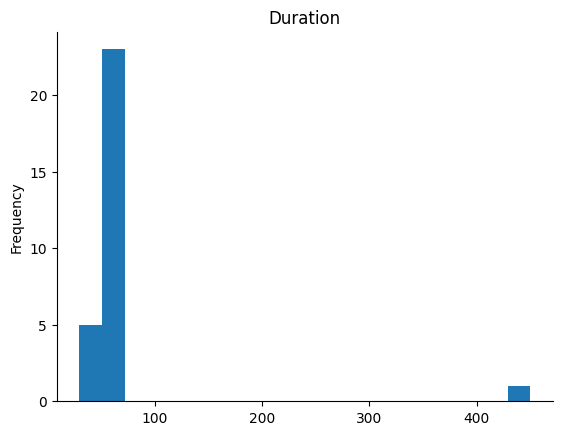

In [ ]:
# @title Duration

from matplotlib import pyplot as plt
df['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.dropna(inplace=True)
df


,Duration,Date,Pulse,Maxpulse,Calories
0,60,01-12-2020,110,130,409.1
1,60,02-12-2020,117,145,479.0
2,60,03-12-2020,103,135,340.0
3,45,04-12-2020,109,175,282.4
4,45,05-12-2020,117,148,406.0
5,60,06-12-2020,102,127,300.0
6,60,07-12-2020,110,136,374.0
7,450,08-12-2020,104,134,253.3
8,30,09-12-2020,109,133,195.1
9,60,10-12-2020,98,124,269.0


In [ ]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,29.000000,29.000000,29.000000,29.000000
mean,70.344828,104.103448,129.275862,305.462069
std,73.386587,7.784347,13.155381,67.030470
min,30.000000,92.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,103.000000,128.000000,300.000000
75%,60.000000,108.000000,133.000000,345.300000
max,450.000000,130.000000,175.000000,479.000000
